### __EDA__

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSV files:

_/datasets/project_sql_result_01.csv_. It contains the following data:

- `company_name`: Name of the taxi company   
- `trips_amount`: The number of trips for each taxi company on November 15 and 16, 2017.   

_/datasets/project_sql_result_04.csv_. It contains the following data:

- `dropoff_location_name`: Chicago neighborhoods where trips ended
- `average_trips`: The average number of trips that ended in each neighborhood in November 2017.

For these two datasets, you now need to

 1. import the files
 2. examine the data they contain
 3. ensure the data types are correct
 4. identify the top 10 neighborhoods in terms of trip completion
 5. make graphs: taxi companies and number of trips, top 10 neighborhoods by number of completions
 6. draw conclusions based on each graph and explain the results

In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind

#### 1. __Path to Data files.__

In [2]:
df_company_trips = pd.read_csv('../data/processed/project_sql_result_01.csv', header='infer')
df_location_trips = pd.read_csv('../data/processed/project_sql_result_04.csv', header='infer')
df_trips_time_weather_duration = pd.read_csv('../data/processed/project_sql_result_07.csv', header='infer')

#### 2. __Explore Data__

In [3]:
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_company_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affili...,11422
2,Medallion L...,10367
3,Yellow Cab,9888
4,Taxi Affili...,9299
...,...,...
59,4053 - 4019...,7
60,2733 - 7460...,7
61,5874 - 7362...,5
62,2241 - 4466...,3


In [5]:
df_location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
df_location_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Green...,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


#### 3. __Data Types__

In [7]:
df_company_trips['company_name'] = df_company_trips['company_name'].astype('string')

In [8]:
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     string
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 1.1 KB


In [9]:
df_location_trips['dropoff_location_name'] = df_location_trips['dropoff_location_name'].astype('string')

In [10]:
df_location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     string 
 1   average_trips          94 non-null     float64
dtypes: float64(1), string(1)
memory usage: 1.6 KB


#### 4. __Top 10 Neighborhoods in terms of trips' completion__

In [11]:
df_location_trips_top_10 = df_location_trips.sort_values(by='average_trips', ascending=False).head(10)
df_location_trips_top_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield &...,1259.766667


#### 5. __Graphs__

5.1 __Company Name - Trips Amount__ 

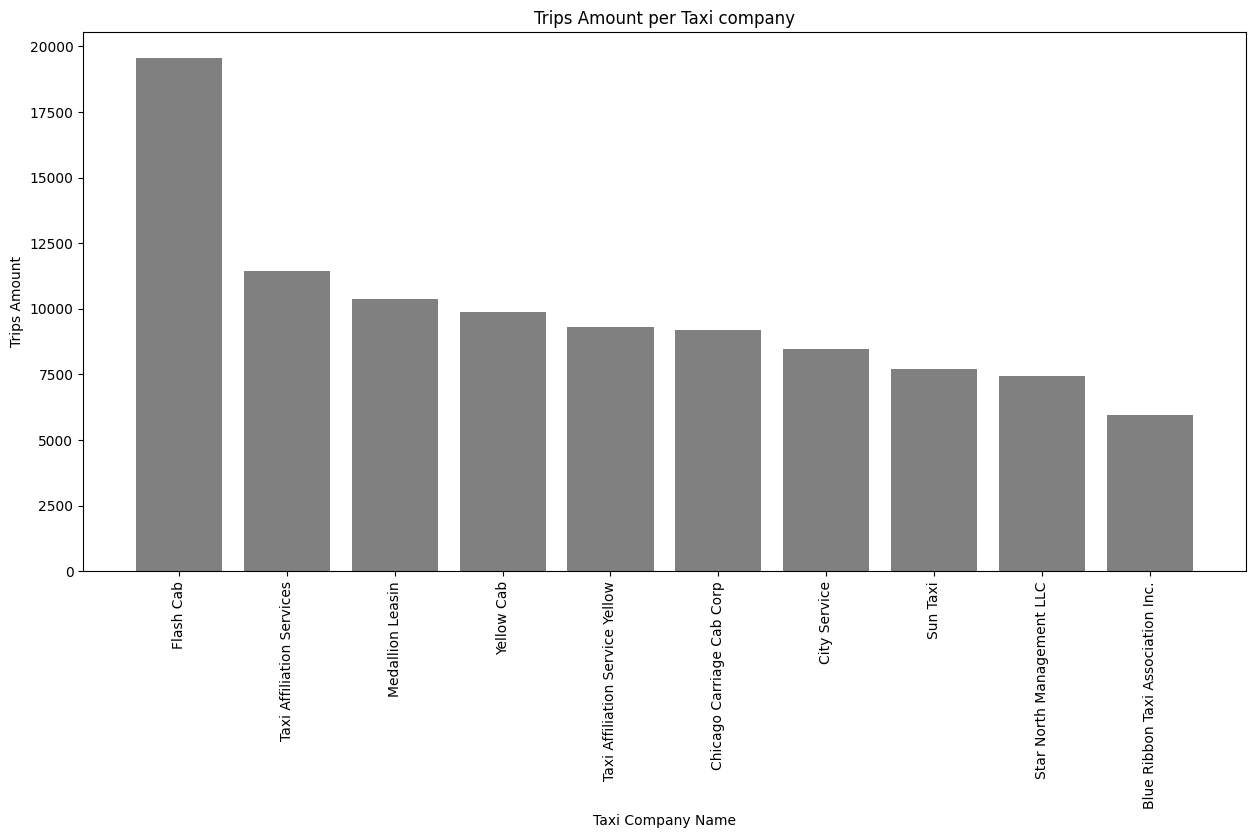

In [12]:
plt.figure(figsize=(15,7))
plt.bar(df_company_trips['company_name'].head(10), df_company_trips['trips_amount'].head(10), color='grey')

plt.xlabel('Taxi Company Name')
plt.ylabel('Trips Amount')
plt.title('Trips Amount per Taxi company')
plt.xticks(rotation=90)

plt.show()

5.1 __Top 10 Neighborhoods - avg Trips__ 

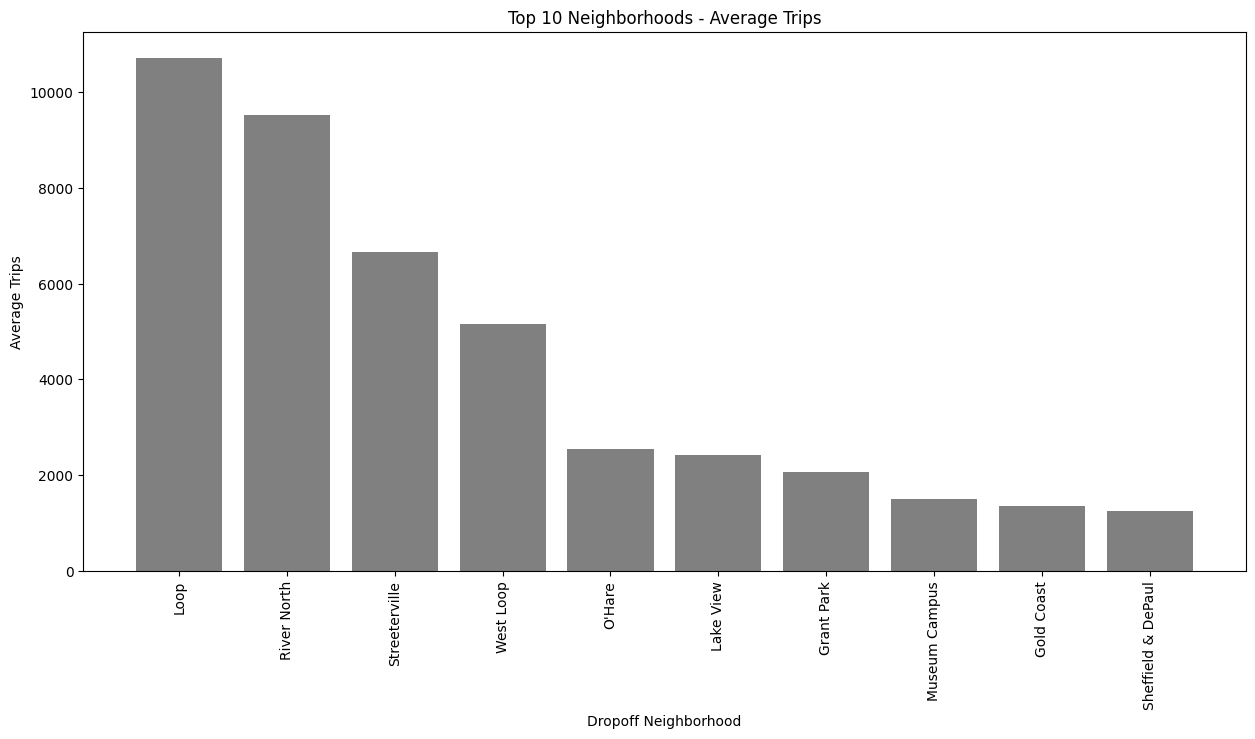

In [22]:
plt.figure(figsize=(15,7))
plt.bar(df_location_trips_top_10['dropoff_location_name'], df_location_trips_top_10['average_trips'], color='grey')

plt.xlabel('Dropoff Neighborhood')
plt.ylabel('Average Trips')
plt.title('Top 10 Neighborhoods - Average Trips')
plt.xticks(rotation=90)

plt.show()

#### __Conclusions__

1. The graph __Company Name - Trips Amount__ shows the distribution of the number of trips made by different taxi companies. The analysis reveals a high concentration of activity among a few companies, while most report significantly lower trip volumes.

    _Key Observations_:

    Dominance of a Few Players:

    Companies such as Flash Cab, Taxi Affiliation Services, and Medallion Leases are leading the way in trip numbers, standing out with significant margins compared to the rest. For example, Flash Cab exceeds 19,000 trips, while the fourth-largest company is already below 10,000.

    More than 50 companies report trip numbers below 2,000, many of them with marginal volumes (< 500).

    This pattern indicates companies or independent licensees with minimal participation, likely with limited or intermittent operations.

    Possible aliases or name inconsistencies:

    Some records appear to correspond to duplicate or mislabeled entities (for example, numeric names like “3721 - Santamaria Express” or simply numeric codes). This suggests that there may be standardization issues in the database, which warrants cleaning and consolidation to avoid analytical errors.

2. The graph __Top 10 Neighborhoods - avg Trips__ represents the 10 neighborhoods with the highest average number of taxi trips as the final destination, offering a clear view of urban mobility patterns and the areas with the highest demand for transportation services.

    _Key Observations_:

    _High concentration_ maybe in downtown and business areas:

    The Loop, River North, and Streeterville top the ranking with significantly higher averages than the rest, might be cuased for central areas with a high density of offices, shops, and tourism, reeflecting typical behavior in large cities: generating greater travel attraction.

    _Lower share_ of residential areas:

    Neighborhoods such as Sheffield & DePaul and Gold Coast, although ranked, have lower averages, suggesting less attractiveness as destinations.


#### 6. __Hypothesis Test__

_/datasets/project_sql_result_07.csv_ — the result of the last query. It contains data on trips from the Loop to O'Hare International Airport. Remember, these are the table's field values:

`start_ts`: Pickup date and time   
`weather_conditions`: Weather conditions at the time the trip started   
`duration_seconds`: Trip duration in seconds   

- Test the hypothesis:

    "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

    Decide on your own where to set the significance level (alpha).

    Explain:

    1. How you formulated the null and alternative hypotheses
    2. What criteria you used to test the hypotheses and why

#### 6.1  Inferential Tests.

Hypotheses:  _"The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."_

6.1.1  Hypotheses testing:

In [26]:
# Hypothesis: "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays."

# 1. Hypotheses H0, H1
# H0: "The average trip duration from the Loop to O'Hare International Airport do not change on rainy Saturdays." are equal (==)
# H1: "The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays." are different (!=)

# Prepare data by plans
df_weather_condition_good = df_trips_time_weather_duration.loc[df_trips_time_weather_duration['weather_conditions'] == 'Good', 'duration_seconds']
df_weather_condition_bad = df_trips_time_weather_duration.loc[df_trips_time_weather_duration['weather_conditions'] == 'Bad', 'duration_seconds']

# 2. Specify Significance or Confidence
# alpha = 5%
# confidence = 95%

alpha = 0.05

In [27]:
# Levene's test, to ensure that the variances of different samples are equal and independent.
# Preventing tests like ANOVA and t-Tests from beingeing "incorrect", increasing the probability of incurring in type 1 or 2 errors

levene_stat, levene_p = st.levene(df_weather_condition_good, df_weather_condition_bad)
display(HTML(f"<b>Levene's Test</b> – Statistic: {levene_stat:.4f}, P-value: {levene_p:.4f}"))

# Determining Equality of Variances
if levene_p < 0.05:
    equal_var = False
    display(HTML("<i>Null Hypothesis H₀ is rejected: the variances are different (heteroscedasticity) → use equal_var=False (Welch version)</i>"))
else:
    equal_var = True
    display(HTML("<i>Null Hypothesis H₀ is not rejected: the variances are equal (homoscedasticity) → use equal_var=True (Normal version)</i>"))

In [29]:
# 3. Calculate critical and test values, define acceptance and rejection zones

t_stat, p_val = ttest_ind(df_weather_condition_good, df_weather_condition_bad, equal_var=True)

display(HTML(f"T-statistic: <b>{t_stat:.15f}</b>"))
display(HTML(f"P-value: <b>{p_val:.15f}</b>"))

# 4. Decision and Conclusion

if p_val < alpha:
    display(HTML("The <i>'H₀ null hypothesis' is rejected</i>, indicating sufficient statistical evidence to affirm that <b>The average trip duration from the Loop to O'Hare International Airport differs significantly between good and bad weather Saturdays.</b>"))
else:
    display(HTML("The <i>'H₀ null hypothesis' is not rejected</i>, indicating insufficient statistical evidence to conclude that <b>The average trip duration from the Loop to O'Hare International Airport differs significantly between good and bad weather Saturdays</b>."))


## Hypothesis Formulation and Testing Criteria

### 1. How were the null and alternative hypotheses formulated?

The objective of this analysis was to evaluate whether weather (good vs. bad) has a significant effect on the **average trip duration** from the Loop to O'Hare International Airport on Saturdays.

#### `Null Hypothesis (H₀)`:
> The average trip duration **does not differ significantly** between Saturdays with good weather and Saturdays with bad weather.

Formally:


H_0: muGood = muBad


#### `Alternative Hypothesis (H₁)`:
> The average trip duration **does differ significantly** between Saturdays with good weather and Saturdays with bad weather.

Formally:


H_1: muGood != muBad


> ⚠️ This is a two-tailed test, since it is not specified whether bad weather increases or decreases the duration—only that there could be a difference in either direction.


### 2. What criterion was used to test the hypotheses and why?

#### Applied statistical test:

A Student's t-test for independent samples (`ttest_ind`) was used to compare the mean trip durations between the two groups of interest:

- **Group 1:** Saturdays with good weather.
- **Group 2:** Saturdays with bad weather.

#### Test assumptions:

- The observations between the two groups are independent.
- Equal variance between groups was assumed (`equal_var=True`), and verified with a Levene's test.

#### Significance level:

A significance level was set at:

\[
\alpha = 0.05
\]

#### Decision criterion:

- If the **p-value < α** → **H₀** is rejected. There is statistically significant evidence to support the claim that climate affects trip duration.
- If the **p-value ≥ α** → **H₀** is not rejected. There is insufficient evidence to support the claim that climate has a significant effect.

#### Justification:

The p-value represents the probability of observing a difference equal to or more extreme than the one found, assuming the null hypothesis is true. If this probability is low (less than 0.05), it is concluded that the observed difference is unlikely to be due to chance.
